In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

# Load the dataset
file_path = '/mnt/data/Shrink Raw.csv'
data = pd.read_csv('Shrink Raw.csv')


In [14]:
# Helper function to convert time strings to timedelta
def time_to_timedelta(time_str):
    try:
        h, m, s = map(int, time_str.split(':'))
        return timedelta(hours=h, minutes=m, seconds=s)
    except ValueError:
        return timedelta(0)

In [15]:
# Convert relevant columns to timedelta
time_columns = ['Talk_Time', 'Hold_Time', 'ACW_Time', 'Break_Time', 'Meeting_Time', 
                'Training_Time', 'RestRoo_Time', 'Tech Issue_Time', 'Chat/Email_Time',
                'Case Time', 'After Call Work_Time', 'Assist_Time', 'Ready Time',
                'Login Hours', 'Productive Time', 'Work_Rel Time']

for col in time_columns:
    data[col] = data[col].apply(time_to_timedelta)

In [16]:
# Convert percentages to numeric values
data['Utilization'] = data['Utilization'].str.rstrip('%').astype(float)
data['Occupancy %'] = data['Occupancy %'].str.rstrip('%').astype(float)

In [17]:
# Summarize total times per category
time_summary = data[time_columns].sum().sort_values(ascending=False)

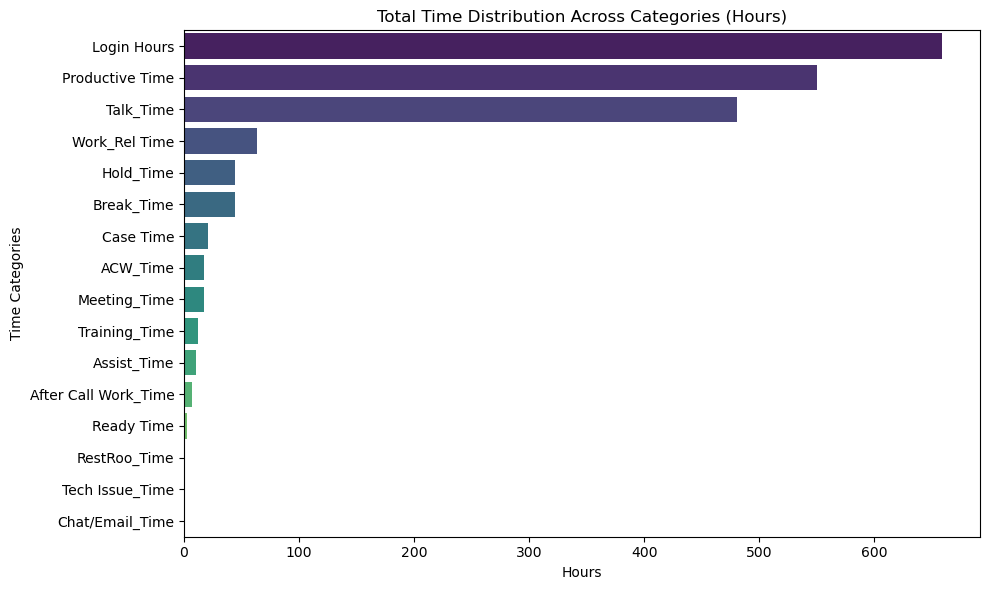

In [18]:
# Plot the distribution of time categories
plt.figure(figsize=(10, 6))
time_summary_hours = time_summary / timedelta(hours=1)  # Convert to hours
sns.barplot(x=time_summary_hours.values, y=time_summary_hours.index, palette='viridis')
plt.title('Total Time Distribution Across Categories (Hours)')
plt.xlabel('Hours')
plt.ylabel('Time Categories')
plt.tight_layout()
plt.show()


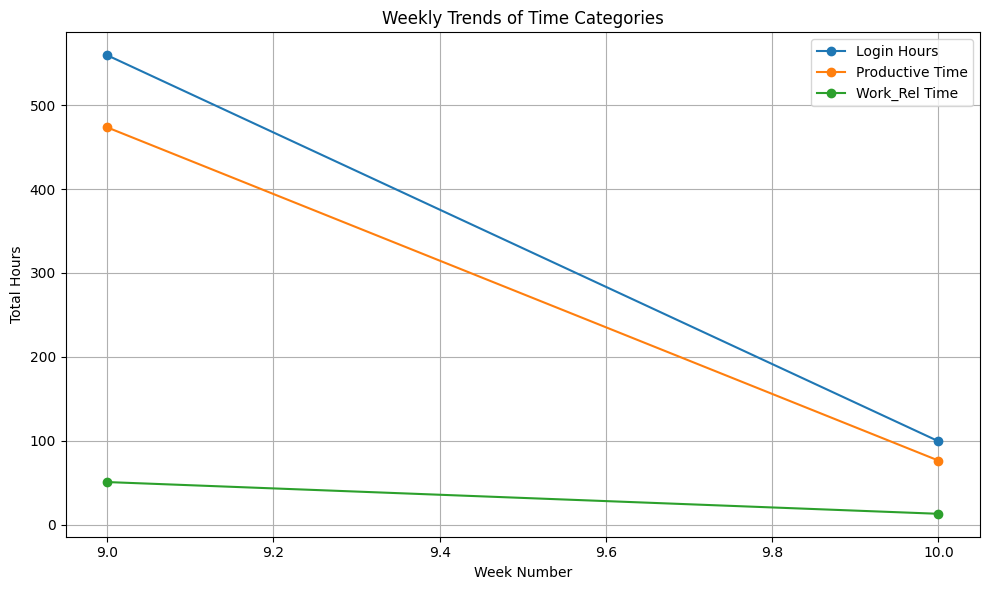

In [13]:
# Analyze trends over weeks
weekly_data = data.groupby('Week2')[['Login Hours', 'Productive Time', 'Work_Rel Time']].sum()
weekly_data_hours = weekly_data / timedelta(hours=1)
weekly_data_hours.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Weekly Trends of Time Categories')
plt.xlabel('Week Number')
plt.ylabel('Total Hours')
plt.grid(True)
plt.tight_layout()
plt.show()

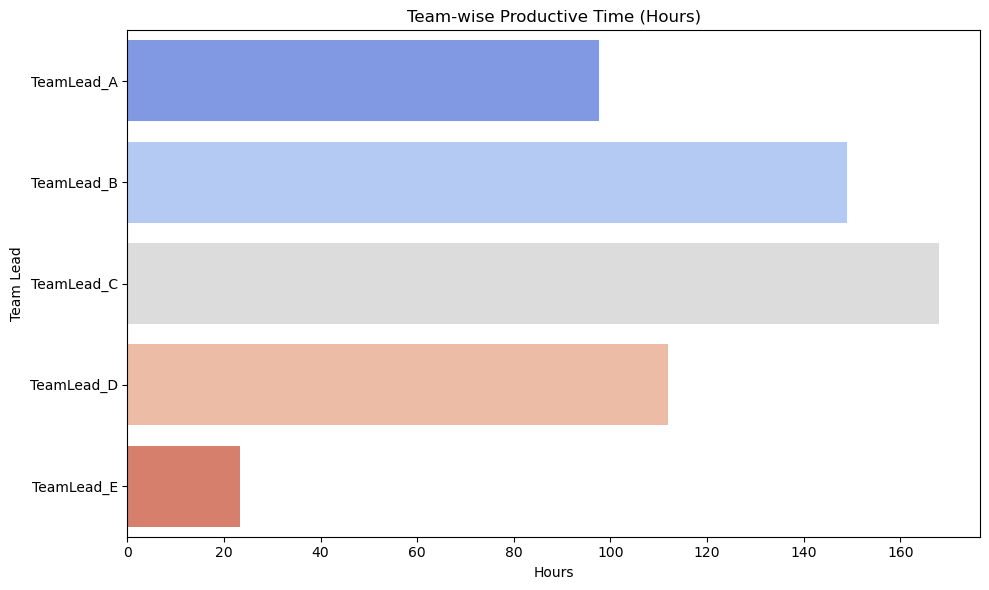

In [19]:
# Team-wise performance comparison
team_performance = data.groupby('Team_Lead')['Productive Time'].sum() / timedelta(hours=1)
plt.figure(figsize=(10, 6))
sns.barplot(x=team_performance.values, y=team_performance.index, palette='coolwarm')
plt.title('Team-wise Productive Time (Hours)')
plt.xlabel('Hours')
plt.ylabel('Team Lead')
plt.tight_layout()
plt.show()


In [15]:
# Summary statistics for utilization and occupancy
util_occupancy_summary = data[['Utilization', 'Occupancy %']].describe()
print("Summary Statistics for Utilization and Occupancy:")
print(util_occupancy_summary)

Summary Statistics for Utilization and Occupancy:
       Utilization  Occupancy %
count   126.000000   126.000000
mean     70.534683    82.264206
std      21.773331    18.427426
min       0.370000    50.020000
25%      49.360000    62.500000
50%      81.195000    93.780000
75%      89.150000    95.662500
max      96.000000   100.000000
